script available on [GitHub][1]
[1]:https://github.com/Paul-St-Young/share/blob/master/python-tutorial/python.ipynb

# Installation and Setup

### Installation

Refer to [this][1] how-to.
[1]: https://wiki.illinois.edu/wiki/display/mse485/How+to+Install+Python

### Manage Python Packages

Python has its own [package manager][2] "pip" to keep Python self-contained. pip also allows access to new packges even if your OS is out-of-date. If you installed Python using Anaconda, then your package manager will be "conda", which also has a nice [documentation][3].
[2]:https://packaging.python.org/installing/
[3]:http://conda.pydata.org/docs/using/pkgs.html


### Running Python

#### interactive mode

Open a terminal and type "python"

#### run a python script

1. Put Python code (eg. `print("hello world")`)  in a file, say "hello.py".
2. Invoke the Python interpreter with the file as its first argument.
```bash
python hello.py
```

#### recommended editors

If you plan to do computational research in the future, please pick either emacs or vim. They are excellent command-line editors with many academic users. Command-line editors have steeper learning curves than GUI-based ones, but you can do way more with them over time (good luck using GUI editors on supercomputers). Many excellent online tutorials exist.

1. [Atom][4]
2. [Sublime][5]
3. [Emacs][6]
4. [Vim][7]

[4]:https://atom.io/
[5]:https://www.sublimetext.com/
[6]:https://www.gnu.org/software/emacs/
[7]:http://www.vim.org/

# Rules!

### Rule #1: Write Comments
The more the better!

In [4]:
# I don't know how to write a program but I am charming, 
#  so I will write down the equations to be implemented 
#  and find a friend to write it :)
""" 
It is annoying to have to start each comment with a #, 
 triple quotation allows multi-line comments. 
 
It is always a good idea to write lots of comment to lay out the 
cohesive idea you had while starting to write a piece of code. 
More often than not, we forget that impressive grand plan we started
with as we fight with syntax error and other nitty-gritty of
talking to a computer.
""";

### Rule #2: Follow Best Practices

An excellent [paper][1] by Greg Wilson et. al. concisely summarizes the best practices of scientific computing. I will steal the most relavant section from the summary paragraph here:

1. Write programs for people, not computers
  1. A program should not require its readers to hold more than a handful of facts in memory at once.
  2. Make names consistent, distinctive, and meaningful.
  3. Make code style and formatting consistent.
2. Let the computer do the work.
  1. Make the computer repeat tasks.
  2. Save recent commands in a file for re-use.
  3. Use a build tool (or Jupyter notebook) to automate and save workflows.
3. Make incremental changes.
  1. Work in small steps with frequent feedback and course correction.
  2. Use a version control system (eg. git,subversion)
  3. Upload all work into version control system
4. Don't repeat yourself (or others)
  1. Every piece of data must have a single authoritative representation in the system.
  2. Modularize code rather than copying and pasting.
  3. Re-use code (yours or others) instead of rewriting it.
5. Plan for mistakes
  1. Add assertions to programs to check their operation.
  2. Use an off-the-shelf unit testing library.
  3. Turn bugs into test cases.

[1]:http://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.1001745

# Basic Use Cases

Much of the following can be found on ["A Beginner's Python Tutorial"][1]
[1]:https://en.wikibooks.org/wiki/A_Beginner%27s_Python_Tutorial

### Using python as a calculator

basic arithmetics are built in

In [5]:
1 + 1

2

In [6]:
2*3

6

In [7]:
2**3

8

In [8]:
7/2 # gotcha !

3

In [9]:
7./2

3.5

In [10]:
5%2 # modulo

1

more advanced functions can be accessed using the numpy package

In [11]:
import numpy as np

In [12]:
np.exp(1j)

(0.54030230586813977+0.8414709848078965j)

In [13]:
np.cos(1) + 1j*np.sin(1)

(0.54030230586813977+0.8414709848078965j)

In [14]:
np.sqrt(144)

12.0

### Loop and Condition

In [15]:
for my_index in [1,2,3]:
    print(my_index)
# end for

1
2
3


In [16]:
for my_index in range(3):
    print(my_index)
# end for

0
1
2


In [17]:
# while loop may not terminate
my_index = 1
while my_index < 4:
    print(my_index)
    my_index += 1 # try comment this out... JK don't do it!
# end while

1
2
3


python uses indentation to determine blocks, you could easily have done
```python
my_index = 1
while my_index < 4:
    print(my_index)
my_index += 1 ```
that would be a big oopsy

#### introducing `break`

In [18]:
# for loop always terminates, thus it is preferred
for my_index in range(10):
    if (my_index>0) and (my_index<=3):
        print(my_index)
    elif (my_index>3):
        break
    # end if
# end for

1
2
3


### Functions

define modular functions to maximize code reusability and readability

In [19]:
def boltzmann_factor(energy_in_J,temperature_in_K):
    # 1 joule = 7.243e22 K *kB
    kB = 1.38e-23 # m^2 kg/ s^2 K
    return np.exp(-float(energy_in_J)/kB/temperature_in_K)
# end def

In [20]:
def fermi_dirac_dist(energy_in_J,temperature_in_K,chemical_pot_in_J):
    denomimator = 1.0/boltzmann_factor(
        energy_in_J-chemical_pot_in_J
        ,temperature_in_K
      ) + 1.0
    return 1.0/denomimator
# end def

In [21]:
def bose_einstein_dist(energy_in_J,temperature_in_K,chemical_pot_in_J):
    denomimator = 1.0/boltzmann_factor(
        energy_in_J-chemical_pot_in_J
        ,temperature_in_K
      ) - 1.0
    return 1.0/denomimator
# end def

In [22]:
# 50% occupation near chemical potential
fermi_dirac_dist(1.01e-22,300,1e-22)

0.49993961352686361

In [23]:
# divergent occupation near chemical potential
bose_einstein_dist(1.01e-22,300,1e-22)

4139.5000201305456

### Tuples, Lists, Dictionaries

list: iterable, extendable, mutable and ordered array of elements

tuple: immutable list

dictionary: iterable, extendable, mutable and un-ordered key-value pairs

In [24]:
mylist = [5,4,2,3,1]
for item in mylist:
    print(item)
# end for

5
4
2
3
1


In [25]:
mylist[2] = 100
mylist.insert(0,50)

In [26]:
for i in range(len(mylist)):
    print( mylist[i] )
# end for

50
5
4
100
3
1


In [27]:
mytuple = (5,4,2,3,1)
for item in mytuple:
    print(item)
# end for

5
4
2
3
1


In [28]:
mytuple[2] = 100
# oopsy-daisies

TypeError: 'tuple' object does not support item assignment

In [29]:
mydict = {0:5,1:4,2:2,3:3,4:1}
for i in range(len(mydict)):
    print( mydict[i] )
# end for

5
4
2
3
1


In [30]:
mydict = {
    "name":"Paul"
    ,"favorite number":42
    ,"where abouts":"elusive"
    ,"hobbies":["coffee","code"]
}
mydict.keys()

['favorite number', 'hobbies', 'name', 'where abouts']

In [31]:
mydict["where abouts"]

'elusive'

In [32]:
mydict["new entry"] = False

In [33]:
for key,value in mydict.iteritems():
    print( "%s : %s" % (str(key),str(value)) )
# end for

favorite number : 42
hobbies : ['coffee', 'code']
name : Paul
new entry : False
where abouts : elusive


#### List Comprehension

In [34]:
mylist = [5,4,2,3,1]
[item**2 for item in mylist]

[25, 16, 4, 9, 1]

In [35]:
square_and_shift = lambda x,y:x**2+y
[square_and_shift(item,50) for item in mylist]

[75, 66, 54, 59, 51]

#### List splicing

In [36]:
# from index 1 to -2 (wrap around)
mylist[1:-2]

[4, 2]

In [37]:
# all even indices
mylist[::2]

[5, 2, 1]

In [38]:
# all odd indices
mylist[1::2]

[4, 3]

#### gotcha!

In [39]:
mylist = [5,4,2,3,1]
entry = [1,2]
mylist.append(entry)
# only a reference to entry is saved, NOT a copy, which means ...
#  entry can be changed elsewhere without mylist knowing

In [40]:
mylist

[5, 4, 2, 3, 1, [1, 2]]

In [41]:
entry[0] = 10
mylist

[5, 4, 2, 3, 1, [10, 2]]

In [42]:
# use a deep copy to avoid the above problem
from copy import deepcopy
mylist = [5,4,2,3,1]
entry = [1,2]
mylist.append( deepcopy(entry) )
entry[0] = 10
mylist

[5, 4, 2, 3, 1, [1, 2]]

### Variables and Scope
The scope of a variable is the union of all places in the code where the variable can be accessed. Variables in a function are "local" and cannot be access by other parts of the program unless returned.

In [43]:
demon_burn_my_soul = 50.0

def firey_hell(demon_burn_my_soul):
    demon_burn_my_soul += 10.
    
firey_hell(20)
print(demon_burn_my_soul)

50.0


In [44]:
# you can use a global variable, but this is NOT recommended
#  see classes for better solution
global demon_burn_my_soul 
demon_burn_my_soul = 50.0

def firey_hell():
    # side effect! bad! bad! bad!
    global demon_burn_my_soul
    demon_burn_my_soul += 10.
    
firey_hell()
print(demon_burn_my_soul)

60.0


### Classes
Classes help bundle together related variables and functions. Well-designed classes are sensible abstract objects that will allow higher level programming without the need to worry about details of implementation.

[fun fact][1]
[1]:http://www.altpress.com/news/entry/the_10_most_metal_words_according_to_science

In [45]:
class RockStar:
    def __init__(self):
        self.demon_burn_my_soul = 50.0
    # end def init
    
    def firey_hell(self):
        self.demon_burn_my_soul += 10.0
    # end def
    
    def cry_my_veins(self):
        return self.demon_burn_my_soul
    # end def cry_my_veins
# end class RockStar

In [46]:
me = RockStar()

In [47]:
me.cry_my_veins()

50.0

In [48]:
me.firey_hell()
me.cry_my_veins()

60.0

### Basic Plotting

In [49]:
trace_text = """-7.436823 -7.290942 -7.271528 -7.282786 -7.283622 -7.268156 -7.401003
 -7.304412 -7.211659 -7.231061 -7.27238  -7.287718 -7.240896 -7.121189
 -7.098841 -7.169402 -7.16689  -7.161854 -7.204029 -7.284694 -7.260288
 -7.368507 -7.472383 -7.442443 -7.448409 -7.409199 -7.353145 -7.242572
 -7.277459 -7.24589  -7.159036 -7.268178 -7.234837 -7.165567 -7.165357
 -7.137534 -7.231942 -7.225935 -7.16142  -7.183465 -7.257877 -7.279006
 -7.284249 -7.306481 -7.240192 -7.286245 -7.316336 -7.251441 -7.192566
 -7.191351 -7.065362 -7.050815 -7.116456 -7.186705 -7.242357 -7.240123
 -7.284564 -7.385903 -7.468834 -7.427641 -7.378051 -7.315574 -7.287397
 -7.262906 -7.197077 -7.187754 -7.136347 -7.149802 -7.301047 -7.281932
 -7.353314 -7.434607 -7.375526 -7.397572 -7.433974 -7.477175 -7.471739
 -7.474228 -7.51791  -7.525722 -7.52028  -7.534158 -7.539559 -7.53915
 -7.533163 -7.426446 -7.417031 -7.475554 -7.41521  -7.377752 -7.319138
 -7.20372  -7.294216 -7.290163 -7.310827 -7.302531 -7.339285 -7.252367
 -7.232718 -7.275662"""

In [50]:
trace = map(float,trace_text.split())

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline 
# Jupyter-specific magic command, ignore for regular script

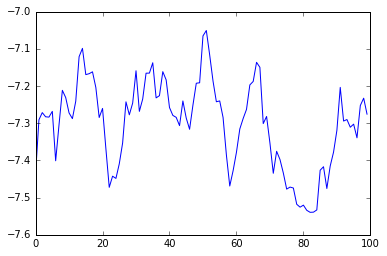

In [52]:
stuff = plt.plot(trace)
# plt.show() needed for regular script

<Container object of 3 artists>

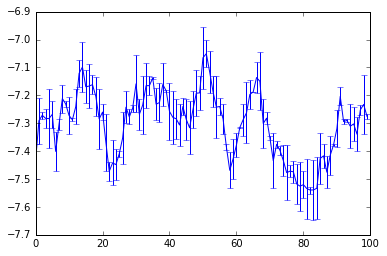

In [53]:
# suppose the entries have error
err = np.std(trace) * np.random.rand(len(trace))
plt.errorbar(range(len(trace)),trace,err)

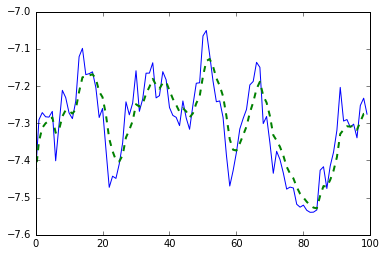

In [54]:
# see trend (correlation) with exponential smoothing
import pandas as pd
data = pd.Series(trace)
plt.plot( trace )
plt.plot( data.ewm(span=5).mean(),ls="--",lw=2 )

# Intermediate Use Cases

### vectorized operations with numpy array

python for loops are VERY slow

numpy vectorized operations are about as fast as fortran (LAPACK under the hood)

In [1]:
import numpy as np

def get_mat_vec(nsize):
    mat = np.random.rand(nsize,nsize)
    vec = np.random.rand(nsize)
    return mat,vec
# end def

def mat_vec_np(mat,vec):

    prod = np.dot(mat,vec)
    
    return prod
# end def

def mat_vec_naive(mat,vec):

    prod = np.zeros(nsize)
    for i in range(nsize):
        for j in range(nsize):
            prod[i] += mat[i,j]*vec[j]
        # end for j
    # end for i
    
    return prod
# end def 

In [2]:
# verify correctness
nsize = 100
mat,vec = get_mat_vec(nsize)

p1 = mat_vec_np(mat,vec)
p2 = mat_vec_naive(mat,vec)

np.allclose(p1,p2)

True

In [3]:
# time it
nsize = 1000
mat,vec = get_mat_vec(nsize)

%timeit mat_vec_np(mat,vec)

The slowest run took 36.17 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 163 µs per loop


In [4]:
%timeit -n 10 mat_vec_naive(mat,vec)

10 loops, best of 3: 512 ms per loop


3 orders of magnitude speed difference!

### particle swarm optimization example

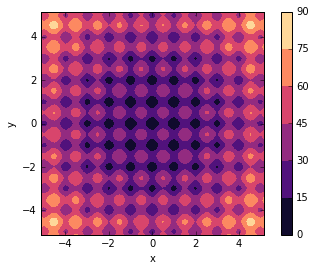

In [1]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
%matplotlib inline

def rastrigin2d(rvec,A=10.):
    ndim  = len(rvec)
    const = A * ndim
    tosum = rvec**2. - A*np.cos(2*np.pi*rvec)
    return const + tosum.sum()
# end def

# put function on a grid for visualization
minx = -5.12
maxx = 5.15
nx   = 100
x = np.linspace(minx,maxx,nx)
grid = np.apply_along_axis(rastrigin2d,1
    ,[np.array([myx,myy]) for myx in x for myy in x] ) # vectorized
grid = grid.reshape(nx,nx) # reshape for plotting

# visualize
fig = plt.figure()
ax  = fig.add_subplot(111,aspect=1)
ax.set_xlabel("x")
ax.set_ylabel("y")

cs = ax.contourf(x,x,grid.T,cmap=plt.cm.magma)
# transpose is needed because matrix index direction and plot axes 
# directions are opposite of one another.

plt.colorbar(cs)
# below I will use pso to find the minimum of this function

In [18]:
# initialize population
pop_size = 20
dim  = 2

pop = (maxx-minx) * np.random.rand(pop_size,dim) + minx

# find personal best
individual_best = np.apply_along_axis(rastrigin2d,1,pop) # vectorized
individual_best_pos = deepcopy(pop) # deep copy for array of arrays

# find population best
min_idx = np.argmin(individual_best)  # find minimum index 
global_best = individual_best[min_idx].copy() # find minimum
global_best_pos = pop[min_idx].copy() # shalow copy sufficient for array

# initialize hopping sizes and directions
max_hop = 0.3
hop = max_hop * np.random.rand(pop_size,dim)

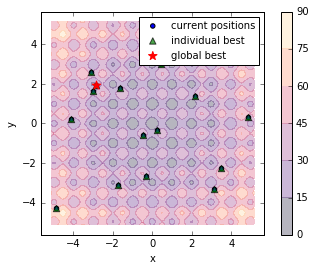

In [19]:
background = plt.figure()
ax = background.add_subplot(111,aspect=1)
ax.set_xlabel("x")
ax.set_ylabel("y")

cs = ax.contourf(x,x,grid.T,alpha=0.3,cmap=plt.cm.magma)
ax.scatter(pop.T[0],pop.T[1],label="current positions")

ax.scatter(individual_best_pos.T[0],individual_best_pos.T[1]
        ,c="g",alpha=0.7,label="individual best",marker='^',s=40)
ax.scatter(global_best_pos[0],global_best_pos[1],color="r"
        ,label="global best",marker="*",s=80)

ax.legend(scatterpoints = 1,fontsize=10,loc="best")
background.colorbar(cs)

In [49]:
c1 = 2
c2 = 2
max_it = 5
for istep in range(max_it):
    
    # evaluate fitness of population
    fitness = np.apply_along_axis(rastrigin2d,1,pop)
    
    # calculate global best
    min_idx = np.argmin(fitness)
    current_best = fitness[min_idx]
    if current_best < global_best:
        global_best = current_best
        global_best_pos = pop[min_idx].copy()
    # end if
    
    # update individual best
    idx = np.where( np.array(fitness) < np.array(individual_best) )
    individual_best[idx]     = fitness[idx]
    individual_best_pos[idx] = deepcopy( pop[idx] )
    
    # update hopping
    hop += c1*np.random.rand()*(individual_best_pos-pop) + \
           c2*np.random.rand()*(global_best_pos-pop)
    idx = np.where( abs(hop) > max_hop )
    hop[idx] = np.sign(hop[idx])*max_hop
    
    # update populaton
    pop += hop
    
# end for istep

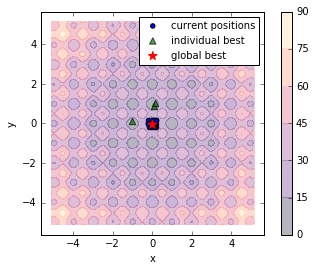

In [50]:
background = plt.figure()
ax = background.add_subplot(111,aspect=1)
ax.set_xlabel("x")
ax.set_ylabel("y")

cs = ax.contourf(x,x,grid.T,alpha=0.3,cmap=plt.cm.magma)
ax.scatter(pop.T[0],pop.T[1],label="current positions")

ax.scatter(individual_best_pos.T[0],individual_best_pos.T[1]
        ,c="g",alpha=0.7,label="individual best",marker='^',s=40)
ax.scatter(global_best_pos[0],global_best_pos[1],color="r"
        ,label="global best",marker="*",s=80)

ax.legend(scatterpoints = 1,fontsize=10,loc="best")
background.colorbar(cs)

In [51]:
global_best

0.0049272768116175314

In [52]:
global_best_pos

array([ 0.00051146, -0.00495746])